In [193]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
import pandas as pd

In [194]:
retail_df = pd.read_csv("Cricket.csv", sep=",", encoding="ISO-8859-1", header=0)
retail_df.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28


In [195]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  79 non-null     object 
 1   Span    79 non-null     object 
 2   Mat     79 non-null     int64  
 3   Inns    79 non-null     int64  
 4   NO      79 non-null     int64  
 5   Runs    79 non-null     int64  
 6   HS      79 non-null     object 
 7   Ave     79 non-null     float64
 8   BF      79 non-null     int64  
 9   SR      79 non-null     float64
 10  100     79 non-null     int64  
 11  50      79 non-null     int64  
 12  0       79 non-null     int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 8.1+ KB


In [196]:
grouped_df=retail_df[['Player','Ave', 'SR']]

In [197]:
# 2. rescaling
rfm_df = grouped_df[['Ave', 'SR']]

# instantiate
scaler = StandardScaler()

# fit_transform
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

(79, 2)

In [198]:
## Hopkins Statistics:
#The Hopkins statistic, is a statistic which gives a value which indicates the cluster tendency, in other words: how well the data can be clustered.
#- If the value is between {0.01, ...,0.3}, the data is regularly spaced.
#- If the value is around 0.5, it is random.
#- If the value is between {0.7, ..., 0.99}, it has a high tendency to cluster.

def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['Ave','SR']
hopkins(rfm_df_scaled)

0.8263993115336394

In [199]:
kmeans = KMeans(n_clusters=4, max_iter=50,random_state=100)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=4, random_state=100)

In [200]:
grouped_df['cluster_id'] = kmeans.labels_
grouped_df.head(20)

<ipython-input-200-d947753b618b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_df['cluster_id'] = kmeans.labels_


,Player,Ave,SR,cluster_id
0,SR Tendulkar (INDIA),44.83,86.23,3
1,KC Sangakkara (Asia/ICC/SL),41.98,78.86,1
2,RT Ponting (AUS/ICC),42.03,80.39,1
3,ST Jayasuriya (Asia/SL),32.36,91.20,0
4,DPMD Jayawardene (Asia/SL),33.37,78.96,2
5,Inzamam-ul-Haq (Asia/PAK),39.52,74.24,1
6,JH Kallis (Afr/ICC/SA),44.36,72.89,1
7,SC Ganguly (Asia/INDIA),41.02,73.70,1
8,R Dravid (Asia/ICC/INDIA),39.16,71.24,1
9,BC Lara (ICC/WI),40.48,79.51,1


In [201]:
grouped_df[grouped_df.cluster_id==0] # C

,Player,Ave,SR,cluster_id
3,ST Jayasuriya (Asia/SL),32.36,91.20,0
10,TM Dilshan (SL),39.27,86.23,0
12,AC Gilchrist (AUS/ICC),35.89,96.94,0
17,CH Gayle (ICC/WI),37.33,85.11,0
20,Yuvraj Singh (Asia/INDIA),36.55,87.67,0
24,V Sehwag (Asia/ICC/INDIA),35.05,104.33,0
27,Shahid Afridi (Asia/ICC/PAK),23.57,117.00,0
50,BB McCullum (NZ),30.41,96.37,0
57,EJG Morgan (ENG/IRE),38.73,88.62,0
59,SR Watson (AUS),40.54,90.44,0


In [202]:
grouped_df[grouped_df.cluster_id==1] # D

,Player,Ave,SR,cluster_id
1,KC Sangakkara (Asia/ICC/SL),41.98,78.86,1
2,RT Ponting (AUS/ICC),42.03,80.39,1
5,Inzamam-ul-Haq (Asia/PAK),39.52,74.24,1
6,JH Kallis (Afr/ICC/SA),44.36,72.89,1
7,SC Ganguly (Asia/INDIA),41.02,73.70,1
8,R Dravid (Asia/ICC/INDIA),39.16,71.24,1
9,BC Lara (ICC/WI),40.48,79.51,1
11,Mohammad Yousuf (Asia/PAK),41.71,75.10,1
18,Saeed Anwar (PAK),39.21,80.67,1
19,S Chanderpaul (WI),41.60,70.74,1


In [203]:
grouped_df[grouped_df.cluster_id==2] ## B

,Player,Ave,SR,cluster_id
4,DPMD Jayawardene (Asia/SL),33.37,78.96,2
14,M Azharuddin (INDIA),36.92,74.02,2
16,PA de Silva (SL),34.90,81.13,2
22,MS Atapattu (SL),37.57,67.72,2
26,HH Gibbs (SA),36.13,83.26,2
28,SP Fleming (ICC/NZ),32.40,71.49,2
30,SR Waugh (AUS),32.90,75.91,2
31,A Ranatunga (SL),35.84,77.90,2
33,Younis Khan (PAK),31.24,75.29,2
35,Saleem Malik (PAK),32.88,76.41,2


In [204]:
grouped_df[grouped_df.cluster_id==3] # A

,Player,Ave,SR,cluster_id
0,SR Tendulkar (INDIA),44.83,86.23,3
13,MS Dhoni (Asia/INDIA),51.32,88.69,3
15,AB de Villiers (Afr/SA),53.55,100.25,3
25,V Kohli (INDIA),53.94,90.99,3
34,HM Amla (SA),50.25,89.05,3
38,MG Bevan (AUS),53.58,74.16,3
42,IVA Richards (WI),47.00,90.20,3
63,MJ Guptill (NZ),43.30,87.73,3
64,MEK Hussey (AUS),48.15,87.16,3


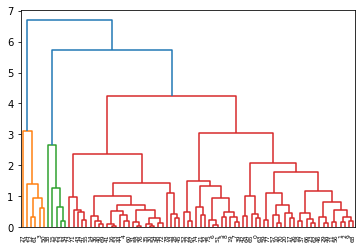

In [205]:
mergings = linkage(rfm_df_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [206]:
cluster_labels = cut_tree(mergings, n_clusters=4).reshape(-1, )
cluster_labels

array([0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 1, 3, 2, 3, 2, 0, 0, 0, 0, 0,
       0, 0, 1, 3, 0, 1, 2, 0, 2, 2, 0, 2, 3, 2, 2, 0, 3, 0, 2, 2, 0, 2,
       2, 2, 0, 2, 2, 0, 1, 0, 0, 2, 2, 2, 0, 0, 2, 0, 2, 1, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 2, 2, 2, 0, 0, 2, 0, 2])

In [207]:
grouped_df['cluster_labels'] = cluster_labels
grouped_df.head()

<ipython-input-207-14f7fc127d10>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_df['cluster_labels'] = cluster_labels


,Player,Ave,SR,cluster_id,cluster_labels
0,SR Tendulkar (INDIA),44.83,86.23,3,0
1,KC Sangakkara (Asia/ICC/SL),41.98,78.86,1,0
2,RT Ponting (AUS/ICC),42.03,80.39,1,0
3,ST Jayasuriya (Asia/SL),32.36,91.20,0,1
4,DPMD Jayawardene (Asia/SL),33.37,78.96,2,2


In [215]:
grouped_df[grouped_df.cluster_labels==0] # C

,Player,Ave,SR,cluster_id,cluster_labels
0,SR Tendulkar (INDIA),44.83,86.23,3,0
1,KC Sangakkara (Asia/ICC/SL),41.98,78.86,1,0
2,RT Ponting (AUS/ICC),42.03,80.39,1,0
5,Inzamam-ul-Haq (Asia/PAK),39.52,74.24,1,0
6,JH Kallis (Afr/ICC/SA),44.36,72.89,1,0
7,SC Ganguly (Asia/INDIA),41.02,73.70,1,0
8,R Dravid (Asia/ICC/INDIA),39.16,71.24,1,0
9,BC Lara (ICC/WI),40.48,79.51,1,0
10,TM Dilshan (SL),39.27,86.23,0,0
11,Mohammad Yousuf (Asia/PAK),41.71,75.10,1,0
